In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
#Dataset is converted is loaded and converted to dataframe.
filepath = 'fcc-forum-pageviews.csv'

with open(filepath, 'r') as reader:
    print(reader)

<_io.TextIOWrapper name='fcc-forum-pageviews.csv' mode='r' encoding='cp1252'>


In [3]:
#Data Cleaning by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
Page_Views_Data = pd.read_csv(filepath)
Page_Views_Data.set_index('date' )
Page_Views_Data = Page_Views_Data.set_index('date' )
Page_Views_Data

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
#Data Cleaning by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
Page_Views_Data = Page_Views_Data[(Page_Views_Data['value'] > Page_Views_Data['value'].quantile(0.025)) & (Page_Views_Data['value'] < Page_Views_Data['value'].quantile(0.975))]


In [5]:
Page_Views_Data

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


findfont: Font family 'Times_New_Roman' not found.
findfont: Font family 'Times_New_Roman' not found.
findfont: Font family 'Times_New_Roman' not found.
findfont: Font family 'Times_New_Roman' not found.
findfont: Font family 'Times_New_Roman' not found.
findfont: Font family 'Times_New_Roman' not found.


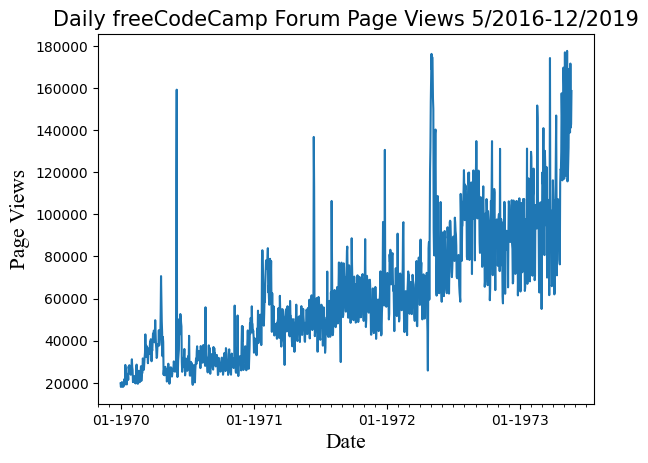

In [6]:
'''Generation of simple lineplot that shows the number of views in a chornological manner. On the x-axis is the date
and the y-axis is the number of views on the web page.'''
ax = plt.subplot()
plt.plot(Page_Views_Data.index, Page_Views_Data['value'])
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', font = 'Times_New_Roman', fontsize = 15, color = 'black')
plt.xlabel('Date', font ='Times New Roman', fontsize = 15.5)
plt.ylabel('Page Views',  font ='Times New Roman', fontsize = 15.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

In [8]:
#The index of the dataframe which contains dates is converted to datetime in the desired format
Page_Views_Data.index = pd.to_datetime(Page_Views_Data.index, format = '%Y-%m-%d')

In [9]:
type(Page_Views_Data['value'])

pandas.core.series.Series

In [10]:
Page_Views_Data.index.month

Index([ 5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
       ...
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12],
      dtype='int32', name='date', length=1238)

In [11]:
#Following is the preparation of dataframe for the barplot that follows.
Results = {'Month' : [], 'Year' : [],'M_Av' : []}
for y in Page_Views_Data.index.year.unique():
    for m in Page_Views_Data.index.month.unique().sort_values():
            Av_ = np.mean(Page_Views_Data['value'][(Page_Views_Data.index.month == m) & (Page_Views_Data.index.year == y)])
            Results['M_Av'].append(Av_)
            Year_ = f'{y}'
            Results['Year'].append(Year_)
            Month_ = f'{m:02}'
            Results['Month'].append(Month_)

Monthly_Av_Views = pd.DataFrame(Results) 
Monthly_Av_Views = Monthly_Av_Views[~Monthly_Av_Views['M_Av'].isna()]
Monthly_Av_Views_sorted_by_Month = Monthly_Av_Views.sort_values(by='Month')
Monthly_Av_Views_sorted_by_Month

,Month,Year,M_Av
36,01,2019,102056.516129
12,01,2017,32785.161290
24,01,2018,58580.096774
25,02,2018,65679.000000
37,02,2019,105968.357143
13,02,2017,31113.071429
38,03,2019,91214.483871
14,03,2017,29369.096774
26,03,2018,62693.774194
39,04,2019,89368.433333


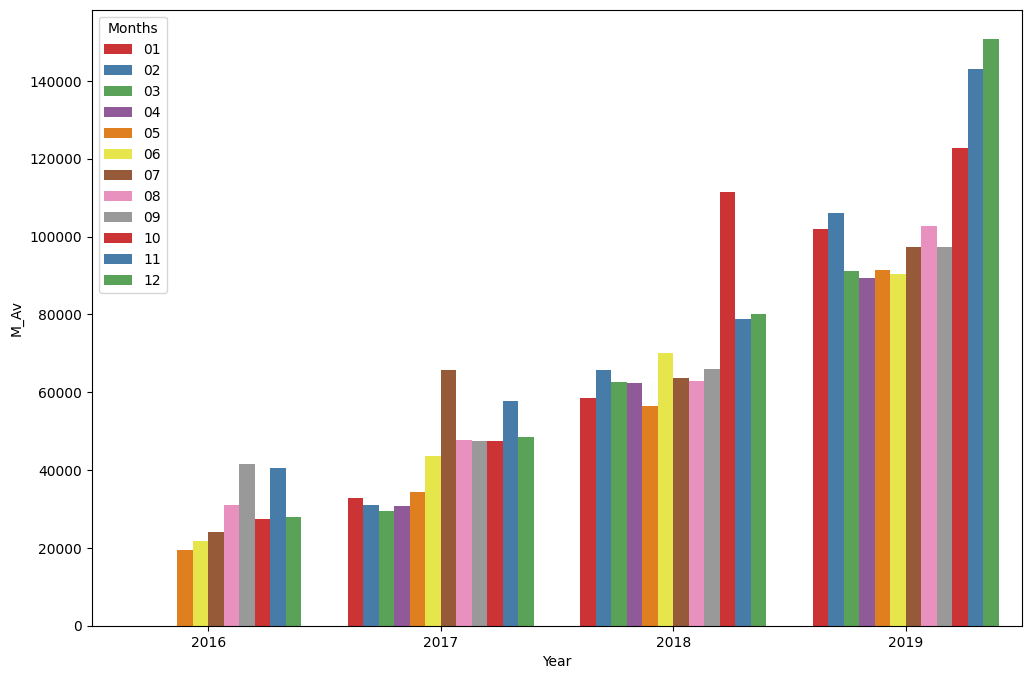

In [12]:
'''Following is a barchart that shows average daily page views for each month grouped by year.
On the chart, the label on the x axis is 'Years' and the label on the y axis is 'Average Page Views'.'''
plt.figure(figsize=(12, 8))
sns.barplot(x = Monthly_Av_Views_sorted_by_Month['Year'].sort_values(), y = Monthly_Av_Views_sorted_by_Month['M_Av'], hue = Monthly_Av_Views_sorted_by_Month['Month'], palette = 'Set1')
legend = plt.legend(loc = 'upper left', title='Months')

In [13]:
#Creation of new columns in the dataframe that contain the corresponding month and year to the number of views.
Page_Views_Data['Month'] = Page_Views_Data.index.strftime('%m')
Page_Views_Data['Year'] = Page_Views_Data.index.strftime('%y')

C:\Users\Muhammad Talha Saeed\AppData\Local\Temp\ipykernel_2736\3876986031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Page_Views_Data['Month'] = Page_Views_Data.index.strftime('%m')
C:\Users\Muhammad Talha Saeed\AppData\Local\Temp\ipykernel_2736\3876986031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Page_Views_Data['Year'] = Page_Views_Data.index.strftime('%y')


In [14]:
Page_Views_Data

,value,Month,Year
date,,,
2016-05-19,19736,05,16
2016-05-26,18060,05,16
2016-05-27,19997,05,16
2016-05-28,19044,05,16
2016-05-29,20325,05,16
...,...,...,...
2019-11-24,138875,11,19
2019-11-29,171584,11,19
2019-11-30,141161,11,19


([<matplotlib.axis.XTick at 0x1c440c5aa40>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

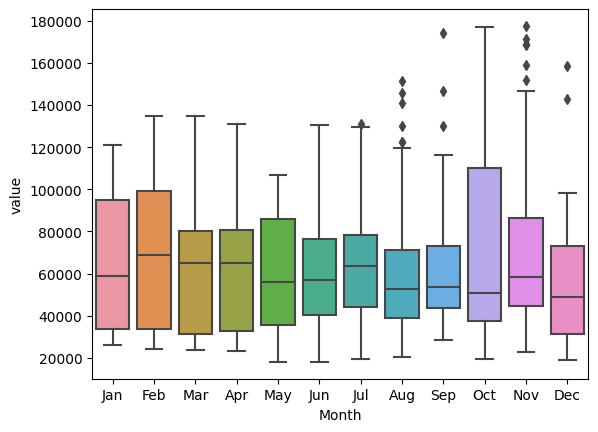

In [15]:
#Following is a boxplot that shows month wise boxplot. It has the number of views on the y-axis and the months on the x-axis.
sns.boxplot(x = Page_Views_Data['Month'].sort_values(), y = Page_Views_Data['value'], data = Page_Views_Data)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

([<matplotlib.axis.XTick at 0x1c440dc6c20>,
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019')])

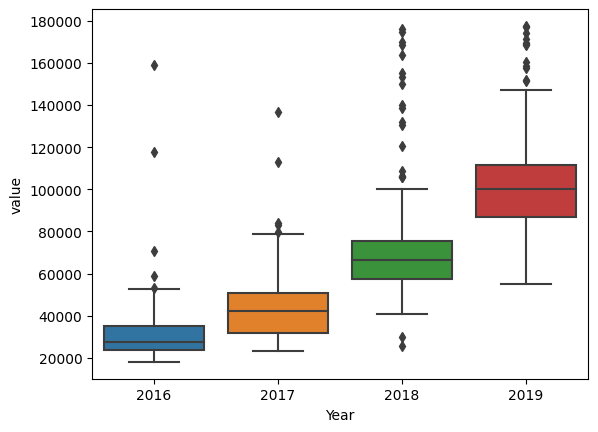

In [16]:
#Following is a boxplot that shows year wise boxplot. It has the number of views on the y-axis and the years on the x-axis.
sns.boxplot(x = Page_Views_Data['Year'].sort_values(), y = Page_Views_Data['value'], data = Page_Views_Data)
plt.xticks([0,1,2,3],
           [2016,2017,2018,2019])